In [30]:
import numpy as np
import pandas as pd
orig = pd.read_csv('~/Desktop/NYCDSA/Capstone/data/Zip_ZORI_AllHomesPlusMultifamily_SSA.csv')
zori = pd.read_csv('~/Desktop/NYCDSA/Capstone/data/zillow-long.csv')

In [31]:
def fixZipcodes(df_zipcol):
    '''
    When loading in the csv, the zipcode column automatically is converted to int type, which has the
    unfortunate side effect of removing the leading zeros. Your input variable should be a column from
    a pandas dataframe. You can use the format `df['col_name']` OR `df.col_name`.
    If you have a (seemingly) three digit (US) zipcode, this corresponds to PR.
    '''
    df_zipcol = df_zipcol.astype(str)
    return ['0'+x if len(x) == 4 else x for x in df_zipcol]

orig['RegionName'] = fixZipcodes(orig.RegionName)
zori['zipcodes'] = fixZipcodes(zori.zipcodes)

In [34]:
# cleaning up the original data set to match the format of the imputed 'zori'
orig = orig.melt(id_vars = ['RegionID','SizeRank','RegionName', 'MsaName'], var_name = "date",value_name="rent")

orig['City']=[row.split(", ")[0] for row in orig['MsaName']]
orig['State'] = [row.split(", ")[1] for row in orig['MsaName']]

orig.drop("MsaName",axis=1,inplace=True)

In [40]:
orig.head()

,RegionID,SizeRank,RegionName,date,rent,City,State
0,61639,1,10025,2014-01,3062.0,New York,NY
1,84654,2,60657,2014-01,1544.0,Chicago,IL
2,61637,3,10023,2014-01,3104.0,New York,NY
3,91982,4,77494,2014-01,1738.0,Houston,TX
4,84616,5,60614,2014-01,1702.0,Chicago,IL


In [41]:
zori.head()

,RegionID,SizeRank,State,City,zipcodes,date,rent
0,61639,1,NY,New York,10025,2014-01,3062.0
1,84654,2,IL,Chicago,60657,2014-01,1544.0
2,61637,3,NY,New York,10023,2014-01,3104.0
3,91982,4,TX,Houston,77494,2014-01,1738.0
4,84616,5,IL,Chicago,60614,2014-01,1702.0


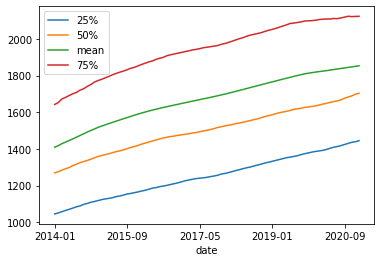

In [67]:
# imputed price trends over time
import matplotlib.pyplot as plt

zori.groupby('date')['rent'].describe()[['25%','50%','mean','75%']].plot()
plt.legend(loc=2)

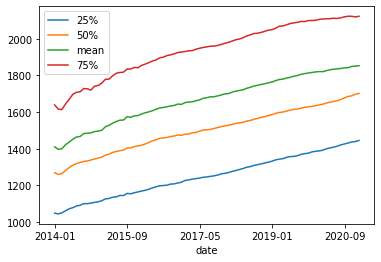

In [68]:
# original price trends over time
orig.groupby('date')['rent'].describe()[['25%','50%','mean','75%']].plot()
plt.legend(loc=2)

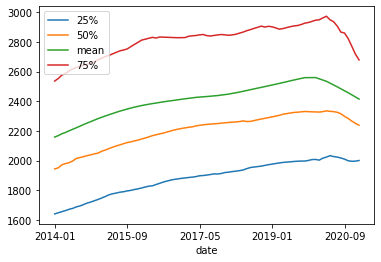

In [70]:
# Let's look at new york city, for example:
zori[zori['City'] == 'New York'].groupby('date')['rent'].describe()[['25%','50%','mean','75%']].plot()

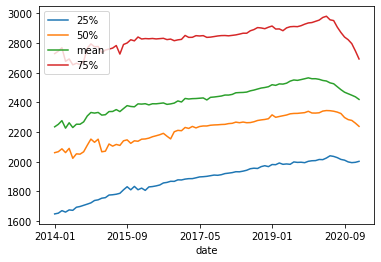

In [74]:
orig[orig['City'] == 'New York'].groupby('date')['rent'].describe()[['25%','50%','mean','75%']].plot()
plt.legend(loc=2)

In [133]:
by_metro = zori.groupby(['City','date'])['rent'].describe()['50%']

In [134]:
by_metro_orig = orig.groupby(['City','date'])['rent'].describe()['50%']

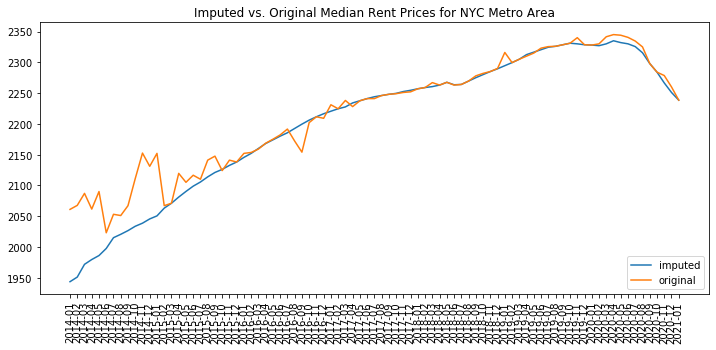

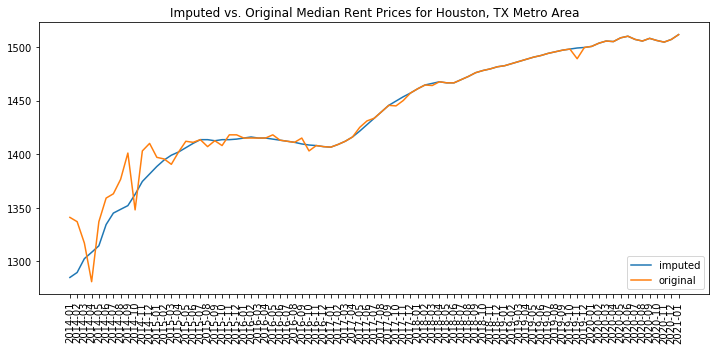

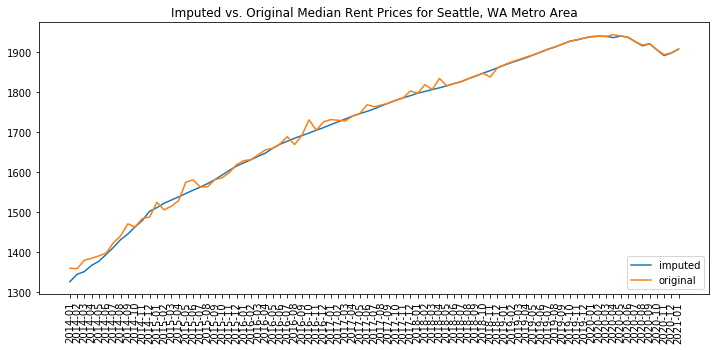

In [168]:
plt.figure(figsize=(12,5))
plt.plot(by_metro.loc['New York'],label='imputed')
plt.plot(by_metro_orig.loc['New York'],label='original')
plt.xticks(rotation = 90)
plt.legend(loc=4)
plt.title('Imputed vs. Original Median Rent Prices for NYC Metro Area')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(by_metro.loc['Houston'],label='imputed')
plt.plot(by_metro_orig.loc['Houston'],label='original')
plt.xticks(rotation = 90)
plt.legend(loc=4)
plt.title('Imputed vs. Original Median Rent Prices for Houston, TX Metro Area')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(by_metro.loc['Seattle'],label='imputed')
plt.plot(by_metro_orig.loc['Seattle'],label='original')
plt.xticks(rotation = 90)
plt.legend(loc=4)
plt.title('Imputed vs. Original Median Rent Prices for Seattle, WA Metro Area')
plt.show()

In [289]:
nyc_orig = orig[orig.City == "New York"][['RegionName','date','rent']]
nyc_zori = zori[zori.City == "New York"][['zipcodes','date','rent']]


In [303]:
temp = nyc_orig.loc[nyc_orig['RegionName'].isin(['10003','10010','10011','10016','10025'])]

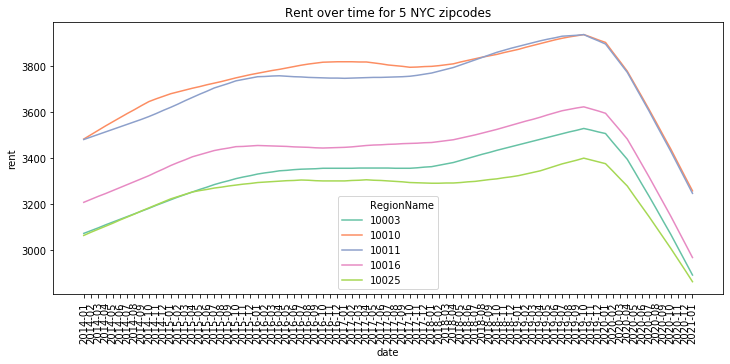

In [305]:
plt.figure(figsize=(12,5))
import seaborn as sns
sns.lineplot(x = 'date', y = 'rent', hue = 'RegionName', palette= "Set2", data = temp)
plt.xticks(rotation = 90)
plt.title('Rent over time for 5 NYC zipcodes')
plt.show()